In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [30]:
font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 10}

## Introdución a la Probabilidad

<cite> El conocimiento estadístico y probabilístico aplicado es el núcleo del conocimiento; la estadística es lo que te dice si algo es verdadero, falsó o anecdótico; es la "lógica de la ciencia"; es el instrumento de la asunción de riesgos... no se puede ser un profesional moderno y no pensar probabilísticamente  (Nassim Nicolás Taleb) <cite> 

<p> Esta serie de notebooks son un complemento para el curso de probabilidades y estadística para ingeniería que estoy impartiendo actualmente, revisaré algunos aspectos fundamentales de la teoría de la probabilidad básica, será un material bastante básico, pero con la intención de esclarecer la idea de probabilidad en los estudiantes que se introducen en la materia.</p>

<img src="../assets/image/intro.jpg" width="800" height="200"/>

### ¿Qué es la probabilidad?

Para definir la probabilidad nos quedaremos con la definición clásica que plantea Laplace, donde en plantea que la probabilidad se comparte por igual entre todos los resultados posibles, siempre que los resultados se consideren igualmente probables.

<cite> La teoría de la probabilidad consiste en reducir todos los eventos de un mismo tipo de casos igualmente probables y determinar el número de casos favorables al evento de la probabilidad que se busca (Pierre-Simon Laplace)<cite>

###### Si bien esta definición ofrece limitaciones, como que solo hay un número finitos de resultados posibles y plantear que los resultados son igualmente probables, pero por ahora nos resulta útil para comprender la idea

<p> Entonces para conocer la probabilidad de un evento <i>A</i> </p> 

$$ P(A) = \frac{N_i}{N}

Una pregunta clásica es acerca del lanzamiento de monedas, ¿Cuál es la probabilidad de que salga cara en la moneda simetrica? 
###### simetrica quiere decir que la moneda no esta doblada o pesa más de un lado. 

Por la formula presentada el resultado sería:
$$ P(A) = \frac{N_i} {N} = \frac{1}{2} $$




Es decir, un elemento favorable de todas las posibilidades,en este caso cara, sobre todos los posibles resultados cara o sello. $ P(A) = \frac{1}{2} $

Ahora esta relación se mantiene?, si lanzamos varias veces la moneda quiere decir que obtendremos la mitad de las veces cara y la otra mitad sello?

Hagamos una simulación

Sabiendo que la probabilidad de cada elemento es 1/2 que sea cara o que se sello. 
Denotaremos los elementos como <cite>T y H ; T= Tail y H=head <cite>, esta notación es para seguir la nomeclatura en caso de que utilizar libros en inglés

In [3]:
lanzamientos  = 10  #Número de lanzamientos
opciones = ['H','T'] #opciones de resultados
prob = [0.5 , 0.5] #Misma probabilidad para cada resultado, una moneda simetrica

In [98]:
simulacion = np.random.choice(['H','T'],size=lanzamientos, p=prob)
print('Los resultados de {} lanzamientos son: {} '.format(lanzamientos,simulacion.tolist()))


Los resultados de 10 lanzamientos son: ['H', 'T', 'H', 'H', 'H', 'T', 'H', 'H', 'T', 'H'] 


In [99]:
valores, cant = np.unique(simulacion, return_counts=True)
print("Para {lan} lanzamientos, la frecuencia relativa de obtener cara fue {p}".format(lan=lanzamientos,p=cant[0]/len(simulacion)))

Para 10 lanzamientos, la frecuencia relativa de obtener cara fue 0.7


La frecuencia relativa se calcula con el número de veces que ocurre un evento dividio por el número total de de intentos en un experimento:

$$ Fr = \frac{N_o} {N_t} $$

Diferenciemos la probabilidad teórica de la frecuencia relativa para poder separar estos conceptos:
La probabilidad teórica de lanzar una moneda es:  $ \frac{1}{2} $, pero es posible que de 10 lanzamientos no se obtenga exactamente 5/5 de los reusltados, pero bien debería de estar cerca.

Si se lanza una moneda cien veces, la cantidad de veces que aparece el resultado a estudiar seria la frecuencia relativa, de modo que si de 10 lanzamientos 6 fueron cara, la fruencia relativa de lanzar cara sería $ \frac{6}{10} $

Construyamos una función para seguir experimentando de manera repetida.

In [100]:
#Tenemos un trigger como boleano para determinar si mostraremos una string o solo la cantidad 
def testI(lanzamientos:int,result:bool):
    a  = lanzamientos
    opciones = ['H','T']
    prob = [0.5 , 0.5]
    simulacion = np.random.choice(opciones,size=lanzamientos, p=prob)
    valores, cant = np.unique(simulacion, return_counts=True)
    if result==True:
        return print("Para {lan} lanzamientos la frecuencia relativa de obtener cara fue {p}".format(lan=lanzamientos,p=cant[0]/a))
    else:
        return cant[0]/len(simulacion)


In [101]:
testI(10,True)

Para 10 lanzamientos la frecuencia relativa de obtener cara fue 0.8


Realizemos el test varias veces

In [102]:
test = 0 #inicializamos el contandor en 1
while test < 10:  #repetiremos el test 10 veces
    testI(10,True) #cada repetición constara de 10 lanzamientos
    test +=1

Para 10 lanzamientos la frecuencia relativa de obtener cara fue 0.5
Para 10 lanzamientos la frecuencia relativa de obtener cara fue 0.6
Para 10 lanzamientos la frecuencia relativa de obtener cara fue 0.7
Para 10 lanzamientos la frecuencia relativa de obtener cara fue 0.8
Para 10 lanzamientos la frecuencia relativa de obtener cara fue 0.6
Para 10 lanzamientos la frecuencia relativa de obtener cara fue 0.3
Para 10 lanzamientos la frecuencia relativa de obtener cara fue 0.3
Para 10 lanzamientos la frecuencia relativa de obtener cara fue 0.5
Para 10 lanzamientos la frecuencia relativa de obtener cara fue 0.7
Para 10 lanzamientos la frecuencia relativa de obtener cara fue 0.3


Se repite el comportamiento esperado al que cuando hicimos una solo test, es decir valores que se mueven cerca al 0.5

¿Qué ocurre si aumentamos la cantidad de lanzamientos?

In [103]:
#Aumentamos la cantidad de lanzamientos a 1000
test = 1
while test < 10:
    testI(1000,True)
    test +=1

Para 1000 lanzamientos la frecuencia relativa de obtener cara fue 0.504
Para 1000 lanzamientos la frecuencia relativa de obtener cara fue 0.482
Para 1000 lanzamientos la frecuencia relativa de obtener cara fue 0.476
Para 1000 lanzamientos la frecuencia relativa de obtener cara fue 0.472
Para 1000 lanzamientos la frecuencia relativa de obtener cara fue 0.537
Para 1000 lanzamientos la frecuencia relativa de obtener cara fue 0.455
Para 1000 lanzamientos la frecuencia relativa de obtener cara fue 0.507
Para 1000 lanzamientos la frecuencia relativa de obtener cara fue 0.529
Para 1000 lanzamientos la frecuencia relativa de obtener cara fue 0.509


Esta vez los valores estuvieron más cerca del 0.5 y se continuaran acercando a medida que aumentos el valor de los lanzamientos, esta idea se explica con la ley de los grandes números y el concepto de frecuencia relativa.

<a href=" https://en.wikipedia.org/wiki/Law_of_large_numbers">    Ley de los grandes números </a>

Continuando con la idea intentemos gráficar el comportamiento para tener una idea visual del asunto

In [108]:
def testII(lanzamientos:int, plot=False):
    a  = lanzamientos
    opciones = ['H','T']
    prob = [0.5 , 0.5]
    simulacion = np.random.choice(opciones,size=lanzamientos, p=prob)
    valores, cant = np.unique(simulacion, return_counts=True)

    if plot == True:
        plt.figure(figsize=(7,5))
        plt.bar(valores,cant)
        plt.title('Frecuencia relativa ')
        
        plt.text(valores[0],cant[0]+(a*0.009),cant[0],font)
        plt.text(valores[0],cant[0]-(cant[0]*0.5),'Fr= {}'.format(round(cant[0]/cant.sum(),3)),font)
        plt.text(valores[1],cant[1]+(a*0.009),cant[1],font)
        plt.text(valores[1],cant[1]-(cant[1]*0.5),'Fr= {}'.format(round(cant[1]/cant.sum(),3)),font)
        plt.show()

    else:
              
        return valores, cant

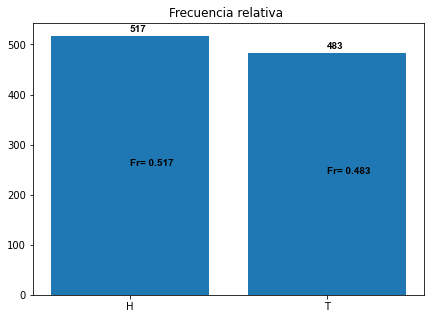

In [109]:
testII(1000,True)

Si se repite el procedimiento varias veces observaremos como las barras cada vez tienen un tamaño similar, o tal y como indica la ley de los grandes números para pocos lanzamientos la frecuencia es inestable, pero si aumentamos los lanzamientos el valor va a estabilizarse, en este caso converger sobre 0.5

Destacar que no se quiere decir que al aumentar la frecuencia se observa una compensación, es decir, si luego de varios intentos con un resultado el siguiente pudiese ser el resultado opuesto, no es así, se debe tener encuentra que los resultados son mutuamente excluyentes, solo despues de muchas repeticiones encontraremos que el valor converge.

Veamos el gráfico de la frecuencia relativa

In [87]:
final = 100000 #número final de lanzamientos
inicio = int(final*0.001) #número inicial


In [88]:
resultados = {}
for i in range(inicio,final,inicio):
    resultados[i] = testI(i,False)
    

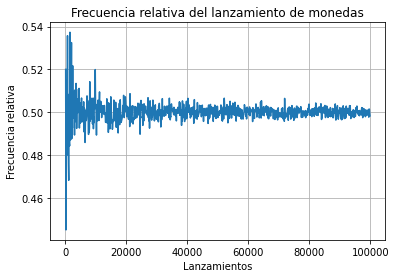

In [97]:
plt.plot(resultados.keys(), resultados.values())
plt.title('Frecuencia relativa del lanzamiento de monedas')
plt.xlabel('Lanzamientos')
plt.ylabel('Frecuencia relativa')
plt.grid()
plt.show()

La frecuecia relativa se usa cuando la probabildiad se estima usando los resultados de un experimento, por ejemplo, para un evento se puede desconocer la probabilidad teórica pero repitiendo el evento con los mismos criterios podemos obtener una probabilidad experimental o frecuencia relativa.

Tener una idea clara de lo que representa la probalidad y las nociones de incertidumbre es el primer paso para superar los sesgo, si bien la educación teórica es fundamental los invito a realizar distintos experimentos con las herramientas presentadas de manera que puedan llevar una educación experimental de manera de rofrozar la formación del razonamiento probabilístico. 

<cita>En el fondo, la teoría de las probabilidades es solo el sentido común expresado con números (Simon Pierre Laplace) </cita> ”